<a href="https://colab.research.google.com/github/Sanam-R/Course_Project/blob/main/Treeleaf_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Approval Prediction Using Neural Network :**<br>
Here I have used neural network Sequential and Dense layer for model.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Read excel file from respective path here i have used google colab and since data set is on sheet named Data so read from that sheet
data = pd.read_excel('/Bank_loan_data.xlsx', sheet_name = 'Data')
data.head()


,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0,1,0,0.0,0
1,2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0,1,0,0.0,0
2,3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0,0,0,0.0,0
3,4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0,0,0,0.0,0
4,5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0,0,0,0.0,1


## **EDA (Exploratory Data Analysis)**

In [33]:
print(data.dtypes)                                # Returns types of data for each column in dataframe.
print("\nDimensionality of data:",data.shape)     # Returns the dimensionality of dataframe.

ID                      int64
Age                     int64
Gender                 object
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Home Ownership         object
Personal Loan          object
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

Dimensionality of data: (5000, 16)


In [35]:

# Returns statistical result such as count, mean, std, min, max of each coulumn for numerical features.
data.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [54]:
# Returns the total no of missing values or null values in the column of dataframe.

data.isnull().sum()

# So from here we knew that Gender, Income, Home Ownership and Online has missing data whereas  Gender and HomeOwnership has lots of missing data also it is a categorical features.

ID                       0
Age                      0
Gender                4520
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        4520
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [37]:
# Correlation :
data.corr()

# Here the correlation betwwen CCAvg and Income is Highest and we can see that target variable 'Personal Loan' has highest correlation with  'Income'.



<ipython-input-37-0c4b12b635d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.022173,-0.008326,-0.022748,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.016972,-0.006909,-0.003776,0.017028
Age,-0.022173,1.000000,0.439132,0.026946,-0.022257,-0.017867,0.011769,0.023981,0.021672,-0.008234,0.022654,0.005506,-0.000087
Experience,-0.008326,0.439132,1.000000,-0.049319,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.001232,0.010353,0.013981,0.008967
Income,-0.022748,0.026946,-0.049319,1.000000,-0.018415,-0.167167,0.643791,-0.204329,0.201489,-0.004553,0.150053,0.011320,-0.008559
ZIP Code,0.013432,-0.022257,-0.028626,-0.018415,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.004704,0.019972,0.017773,0.007691
Family,-0.016797,-0.017867,-0.052563,-0.167167,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.019994,0.014110,0.010994,0.011588
CCAvg,-0.024672,0.011769,-0.050089,0.643791,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.015087,0.136537,-0.002092,-0.006686
Education,0.021463,0.023981,0.013152,-0.204329,-0.017377,0.064929,-0.136138,1.000000,-0.033327,-0.010812,0.013934,-0.014292,-0.011014
Mortgage,-0.013920,0.021672,-0.010582,0.201489,0.007383,-0.020445,0.109909,-0.033327,1.000000,-0.005411,0.089311,-0.005379,-0.007231
Securities Account,-0.016972,-0.008234,-0.001232,-0.004553,0.004704,0.019994,0.015087,-0.010812,-0.005411,1.000000,0.317034,0.011502,-0.015028


<ipython-input-38-374d951994f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


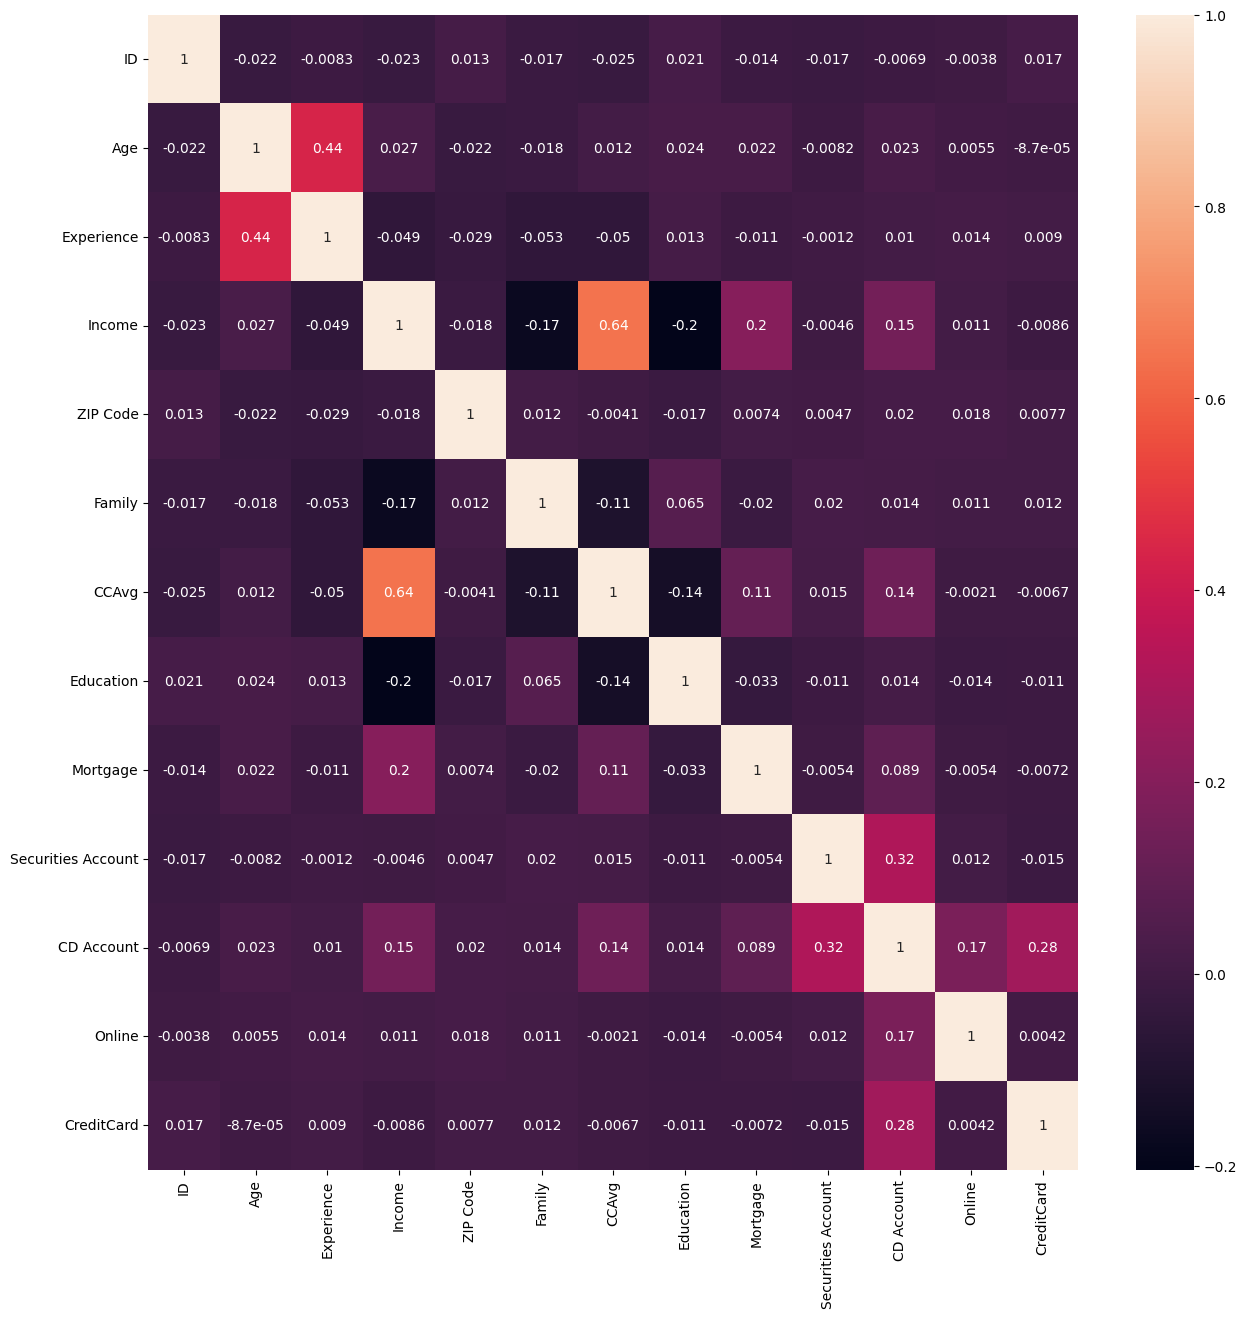

In [38]:
# Visulization for correlation using heatmap for more clear understanding.
correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True)
plt.show()

In [56]:
# will be useful for handling missing data in preprocessing step.

print("Total Value Counts:\n",data['Online'].value_counts())
print("Avg Income :",data['Income'].mean())


Total Value Counts:
 1.0    2961
0.0    1999
Name: Online, dtype: int64
Avg Income : 72.75815933509021


## **DATA Preprocessing**

In [62]:
#Since it has very high amount of data that is null also ID is not important.

new_data = data.drop(['ID','Gender','Home Ownership'], axis = 1)


# Handling missing value for Income (i.e using mean to replace the missing value)
new_data['Income'] = new_data['Income'].replace(np.nan, new_data['Income'].mean())

# Handling missing value for Online (i.e using mode to replace the missing value as small amount of value  is missing compare to dataset )
mode = new_data['Online'].mode()
print("\nmode\n",mode)

new_data['Online'] = new_data['Online'].replace(np.nan, 1.0)
# Exploring if there is any missing data
print("\n Seeing if there is any missing data\n",new_data.isnull().sum())      # no missing data is seen

# Seeing the target Variable
print("Before removing whitespsace \n",data['Personal Loan'].value_counts())

# Since there is one white space value we replace that with 0 as it occurs most in the data
new_data['Personal Loan'] = new_data['Personal Loan'].replace(' ', 0)

print("\nAfter replacing white space with 0\n",new_data['Personal Loan'].value_counts())




mode
 0    1.0
Name: Online, dtype: float64

 Seeing if there is any missing data
 Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Before removing whitespsace 
 0    4520
1     479
        1
Name: Personal Loan, dtype: int64

After replacing white space with 0
 0    4521
1     479
Name: Personal Loan, dtype: int64


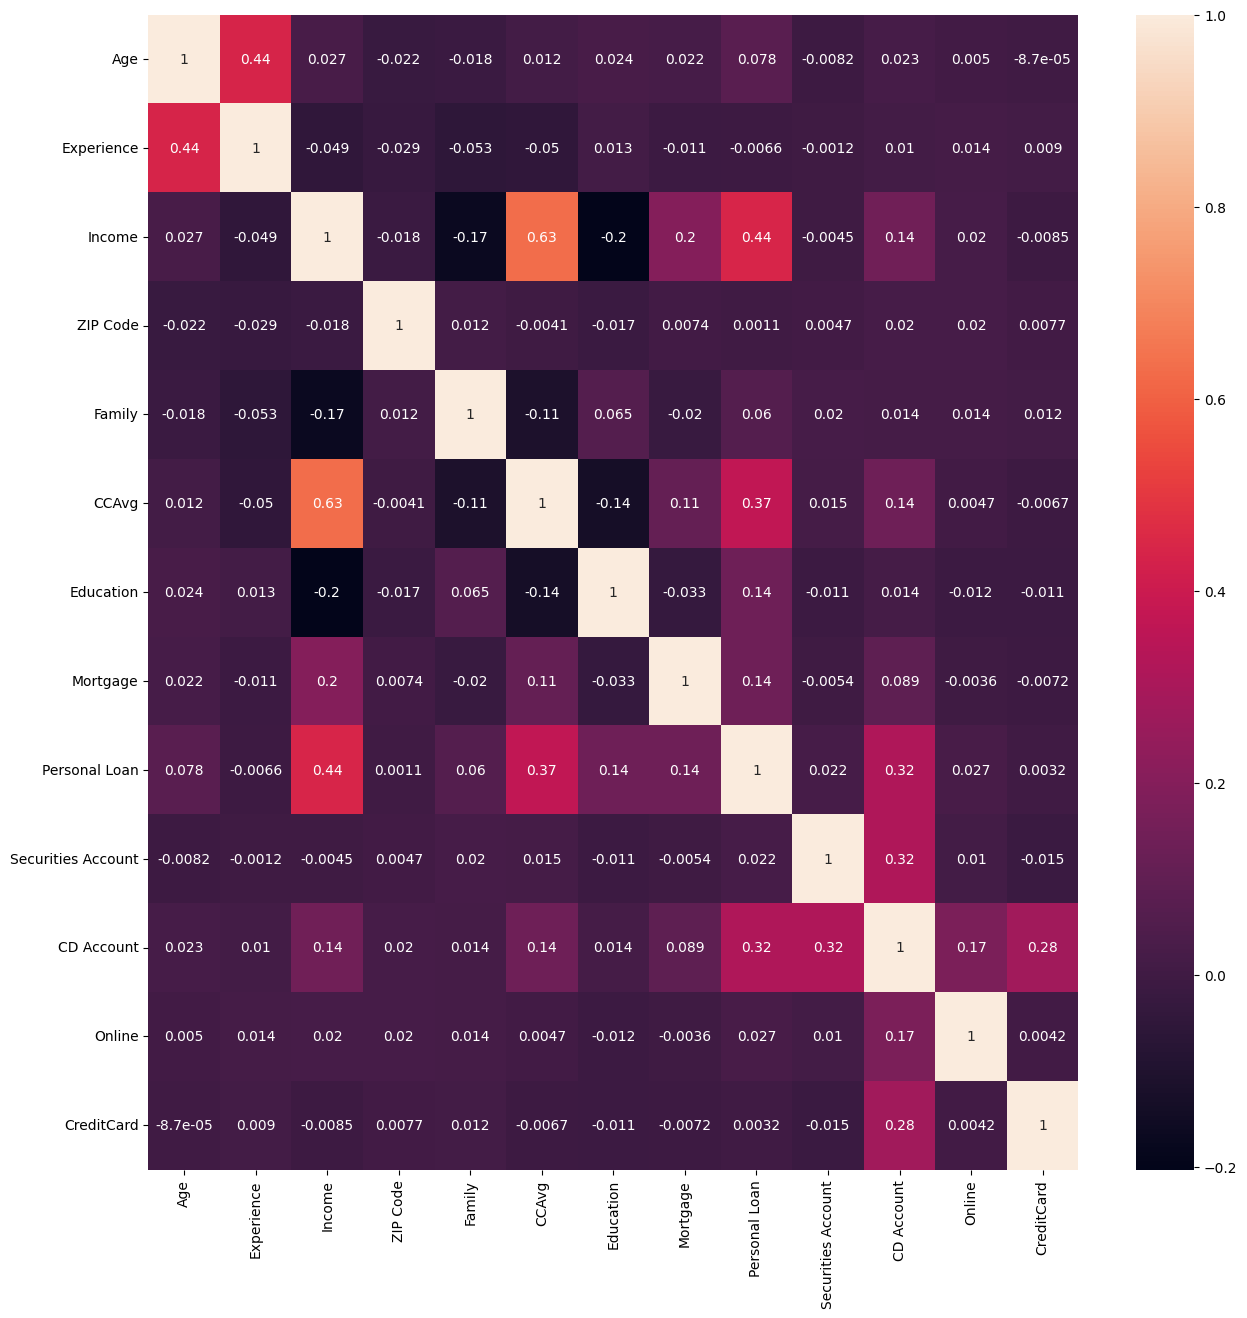

In [63]:
correlation = new_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True)
plt.show()

In [64]:
# One hot encoding for  'Personal Loan'(target variable)
target_variable =pd.get_dummies(new_data['Personal Loan'])
# Changing name of column
target_variable = target_variable.rename(columns ={0:'Loan Not Approved', 1: 'Loan Approved'})
target_variable.head()

,Loan Not Approved,Loan Approved
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [65]:
# Assigning Feature and target to X and Y .
X = new_data.drop(columns=["Personal Loan"])
Y = target_variable


In [66]:

# Making training, validation and testing data with 80/20 ratio (i.e 80% for train and 20% for test and validation).
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

# Normalizing train and test dataset .
X_train = StandardScaler().fit_transform(X_train)
X_test =  StandardScaler().fit_transform(X_test)

X_train.shape



(4000, 12)

## Training the dataset using NN  Sequential Model.

In [67]:
# Using relu as hidden layer activation function with 64 units and softmax as the output layer activation function with 2 units:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [68]:
# Updating parameter with 'adam' which works better than 'gradient descent' and for loss we used 'categorical_crossentropy' .
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 300)               3900      
                                                                 
 dense_31 (Dense)            (None, 300)               90300     
                                                                 
 dense_32 (Dense)            (None, 300)               90300     
                                                                 
 dense_33 (Dense)            (None, 300)               90300     
                                                                 
 dense_34 (Dense)            (None, 2)                 602       
                                                                 
Total params: 275,402
Trainable params: 275,402
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
125/125 [==============================] - 2s 8ms/step - loss: 0.1682 - accuracy: 0.9398
Epoch 2/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0989 - accuracy: 0.9653
Epoch 3/100
125/125 [==============================] - 2s 14ms/step - loss: 0.0877 - accuracy: 0.9680
Epoch 4/100
125/125 [==============================] - 2s 13ms/step - loss: 0.0760 - accuracy: 0.9760
Epoch 5/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0732 - accuracy: 0.9732
Epoch 6/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0710 - accuracy: 0.9743
Epoch 7/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0680 - accuracy: 0.9762
Epoch 8/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0603 - accuracy: 0.9795
Epoch 9/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0560 - accuracy: 0.9803
Epoch 10/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0524 - accu

## *MODEL EVALUATION*

In [70]:
# importing module from sklearn library for model evaluation
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

In [51]:

y_pred = model.predict(X_test)
# Convert the predicted probabilities to class labels
y_pred_classes = y_pred.argmax(axis=1)

# Convert the true labels to class labels
y_true_classes = y_test.values.argmax(axis=1)


# Evaluation using accuracy, precison, F1_Score, Recall
acurracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy_Score:",acurracy)
precision_micro = precision_score(y_true_classes, y_pred_classes, average='micro')
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')

print("Macro-averaged Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)


f1_macro = f1_score(y_true_classes, y_pred_classes, average='macro')
f1_weighted = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("macro f1:", f1_macro)
print("weighted f1:",f1_weighted)

recall_macro = recall_score(y_true_classes, y_pred_classes, average='macro')
recall_weighted = recall_score(y_true_classes, y_pred_classes, average='weighted')

print("recall macro:", recall_macro)
print("recall weighted:", recall_weighted)


32/32 [==============================] - 0s 6ms/step
Accuracy_Score: 0.974
Macro-averaged Precision: 0.9331077298865198
Weighted Precision: 0.9734073584041526
macro f1: 0.9198312756694089
weighted f1: 0.9736046078516016
recall macro: 0.9075368703313542
recall weighted: 0.974


In [71]:
# Classification Report:
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.88      0.83      0.85        92

    accuracy                           0.97      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.97      0.97      0.97      1000

